In [6]:
from sklearn.metrics import f1_score

# 实际标签
y_true = [1, 0, 1, 1, 0, 1, 0]
y_pred = [1, 0, 1, 0, 0, 1, 1]


# 计算类别为 0 的 F1 分数
f1_label_0 = f1_score(y_true, y_pred, labels=[0], average='macro')

# 计算类别为 1 的 F1 分数
f1_label_1 = f1_score(y_true, y_pred, labels=[1], average='macro')

# 计算整个数据集的二分类 F1 分数
f1_binary = f1_score(y_true, y_pred, average='macro')

print("F1 Score for label 0:", f1_label_0)
print("F1 Score for label 1:", f1_label_1)
print("Binary F1 Score:", f1_binary)
print((f1_label_0+f1_label_1)/2)


F1 Score for label 0: 0.6666666666666666
F1 Score for label 1: 0.75
Binary F1 Score: 0.7083333333333333
0.7083333333333333


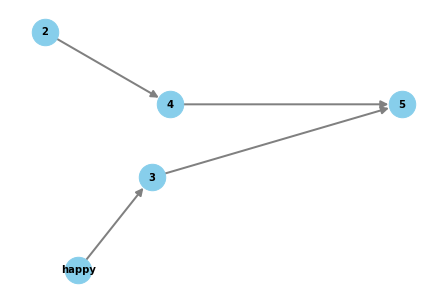

('happy', 3, {'type': 3})
(2, 4, {'type': 0})
(3, 5, {})
(4, 5, {})


In [364]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建一个有向图
G = nx.DiGraph()
def a(G1):
# 添加节点
    G1.add_node('happy')
    G1.add_nodes_from([2, 3, 4, 5])

    # 添加有向边
    # G1.add_edge('happy', 2,attr={'weight':3})
    G1.add_edges_from([('happy', 3,{'type':3}), (2, 4,{'type':0}), (3, 5), (4, 5)])
a(G)
# # 可视化图形
pos = nx.spring_layout(G)  # 指定节点位置布局
nx.draw(G, pos, with_labels=True, font_weight='bold', arrowsize=15, node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=2)

plt.show()
for edge in G.edges(data=True):
    print(edge)


In [185]:
# import torch

# def adjacency_matrix_to_edge_index_type(adjacency_matrix,maxlen = 3):
#     # 获取邻接矩阵的形状
#     num_nodes = adjacency_matrix.size(0)

#     # 寻找非零元素的索引
#     edge_indices = torch.nonzero(adjacency_matrix, as_tuple=False)[:maxlen,:]
#     print(edge_indices)
#     # 获取非零元素的值，即边的类型
#     edge_values = adjacency_matrix[edge_indices[:, 0], edge_indices[:, 1]]

#     # 将边索引转置为COO格式的edge_index
#     edge_index = edge_indices.t()

#     return edge_index, edge_values,edge_indices

# # 示例邻接矩阵
# adjacency_matrix = torch.tensor([[0, 1, 0, 1],
#                                  [1, 0, 1, 0],
#                                  [0, 1, 0, 1],
#                                  [1, 0, 1, 0]])

# # 将邻接矩阵转换为edge_index和edge_type
# edge_index, edge_type,edge_indices = adjacency_matrix_to_edge_index_type(adjacency_matrix)

# # 打印结果
# print("Edge Index:", edge_index)
# print("Edge Type:", edge_type)


tensor([[0, 1],
        [0, 3],
        [1, 0]])
Edge Index: tensor([[0, 0, 1],
        [1, 3, 0]])
Edge Type: tensor([1, 1, 1])


In [388]:
import torch
from torch_geometric.nn import RGCNConv
from torch_geometric.data import Data, DataLoader, Batch
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
class RGCN(torch.nn.Module):
    def __init__(self, in_channels, out_channels, num_relations):
        super(RGCN, self).__init__()
        self.conv1 = RGCNConv(in_channels, out_channels, num_relations=num_relations)
        self.conv2 = RGCNConv(out_channels, out_channels, num_relations=num_relations)
        
    def forward(self, x, edge_index, edge_type, batch=None):
        print(x, edge_index, edge_type)
        x = self.conv1(x, edge_index, edge_type)
        x = torch.relu(x)
        x = self.conv2(x, edge_index, edge_type)
        return x

# 示例参数
in_channels = 7
out_channels = 7
num_relations = 5
model = RGCN(in_channels, out_channels, num_relations)

# 创建几个示例图数据
data_list = [
    Data(x=torch.randn(3, in_channels), edge_index=torch.tensor([[0], [1]], dtype=torch.long), edge_type=torch.tensor([0])),
    Data(x=torch.randn(3, in_channels), edge_index=torch.tensor([[0, 2,1], [2, 0,2]], dtype=torch.long), edge_type=torch.tensor([1, 2,1]))
    # 添加更多图数据
]

# x = torch.cat([data.x for data in data_list], dim=0)
# edge_index = torch.cat([data.edge_index for data in data_list], dim=1)
# edge_type = torch.cat([data.edge_type for data in data_list], dim=0)

# print(edge_index, edge_type)
# out = model(x, edge_index, edge_type)
# # print(out.size())
# print(out)
# 创建DataLoader用于批量处理
print(torch.randn(3, in_channels).size(), torch.tensor([[0, 2,1], [2, 0,2]], dtype=torch.long).size(), torch.tensor([1, 2,1]).size())
loader = DataLoader(data_list, batch_size=2,shuffle=False)

# 迭代批量处理
for batch_data in loader:
# batch_data = list(loader)[0]
    # print(batch_data.edge_index, batch_data.edge_type)
    graph_text_out = model(batch_data.x, batch_data.edge_index, batch_data.edge_type, batch_data.batch)
    print(graph_text_out,graph_text_out.size())
    # print([len(d) for d in batch_data.x])
    graph_output_split = torch.split(graph_text_out, [3,3], dim=0)
    # print(graph_output_split)
    graph_text_out = torch.cat([_item.unsqueeze(0) for _item in graph_output_split],0)

torch.Size([3, 7]) torch.Size([2, 3]) torch.Size([3])
tensor([[ 1.9466,  2.0370,  1.0379,  0.3330,  0.2771, -0.9965,  0.9785],
        [-0.4414, -0.2610,  0.7980, -1.1071,  2.3306, -1.0456, -0.4750],
        [-0.4953, -0.1984,  2.2149, -0.1367, -1.0182,  0.1784,  1.3025],
        [-0.5644, -0.9184, -0.7496, -0.0949,  1.1009,  0.6002, -0.3380],
        [-0.4058,  0.9472, -0.1220, -0.3622, -1.5858, -0.4523,  0.3305],
        [ 2.1748, -0.2259, -0.2408,  1.7152, -0.7550,  1.5929,  0.3667]]) tensor([[0, 3, 5, 4],
        [1, 5, 3, 5]]) tensor([0, 1, 2, 1])
tensor([[-0.1749,  0.0120, -0.0954,  0.2538, -0.2454, -0.2480,  0.2549],
        [ 0.1086, -0.9078,  0.3624, -0.2280, -0.8461,  0.2396,  1.1302],
        [-0.9482,  1.8715,  0.3490,  0.2569,  0.8595,  0.9544, -1.0633],
        [-1.4884, -0.5297, -0.6305,  0.4051, -0.8209,  1.7092, -0.1625],
        [-0.4194,  0.1931, -0.0578, -0.1672, -0.3609,  0.4197,  0.4662],
        [ 0.2917,  0.1338,  0.6785, -0.3219, -1.4433, -0.6485,  0.5289]],
  

/home/dingdaijun/anaconda3/envs/ddj_prompt/lib/python3.9/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [389]:
print(data_list)

[Data(x=[3, 7], edge_index=[2, 1], edge_type=[1]), Data(x=[3, 7], edge_index=[2, 3], edge_type=[3])]


In [390]:
print(list(loader)[0])

DataBatch(x=[6, 7], edge_index=[2, 4], edge_type=[4], batch=[6], ptr=[3])


In [380]:
import torch
from torch_geometric.nn import RGCNConv
# from torch_geometric.data import Data, DataLoader, Batch
from torch.utils.data import DataLoader

class RGCN(torch.nn.Module):
    def __init__(self, in_channels, out_channels, num_relations):
        super(RGCN, self).__init__()
        self.conv1 = RGCNConv(in_channels, out_channels, num_relations=num_relations)
        self.conv2 = RGCNConv(out_channels, out_channels, num_relations=num_relations)

    def forward(self, x, edge_index, edge_type, batch):
        x = self.conv1(x, edge_index, edge_type)
        x = torch.relu(x)
        x = self.conv2(x, edge_index, edge_type)
        return x

# 示例参数
in_channels = 7
out_channels = 7
num_relations = 3
model = RGCN(in_channels, out_channels, num_relations)

# 创建几个示例图数据
data_list = [
    [torch.randn(6, in_channels), torch.tensor([[0, 1], [1, 0],[0,0],[0,0]], dtype=torch.long), torch.tensor([0, 1,-1,-1])],
    [torch.randn(6, in_channels), torch.tensor([[0, 2], [2, 0],[0,0],[0,0]], dtype=torch.long), torch.tensor([1, 2,-1,-1])],
    # 添加更多图数据
]

# 创建DataLoader用于批量处理
# loader = DataLoader(data_list, batch_size=2,shuffle=True)
loader = DataLoader(data_list, batch_size=2, shuffle=True)
# 迭代批量处理
for data in loader:
    # print(data[2].size())
    x_batch = torch.cat([d for d in data[0]], dim=0)
    edge_index_batch = torch.cat([d1[d2>=0] for d1,d2 in zip(data[1],data[2])], dim=1)
    edge_type_batch = torch.cat([d[d>=0] for d in data[2]], dim=0)
    batch = torch.cat([torch.full_like(d[:, 0], i) for i, d in enumerate(data[0])])
    output = model(x_batch, edge_index_batch, edge_type_batch, batch)
    output_split = torch.split(output, [len(d) for d in data[0]], dim=0)
    output = torch.cat([soutput_split.unsqueeze(0) for soutput_split in output_split],0)
    print(output.size(),output_split[0].size(),edge_type_batch,edge_index_batch,batch)

torch.Size([2, 6, 7]) torch.Size([6, 7]) tensor([0, 1, 1, 2]) tensor([[0, 1, 0, 2],
        [1, 0, 2, 0]]) tensor([0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.])


In [387]:
a = torch.tensor([[1,2,0,0],[2,1,0,0]])
b = torch.tensor([1,1,-1,-1])
b[b>=0],a[:,:len(b[b>=0])]

(tensor([1, 1]),
 tensor([[1, 2],
         [2, 1]]))

In [288]:
a = torch.tensor([[0, 1],
        [1, 0],
        [1, 2],
        [2, 1]])
a.size()

torch.Size([4, 2])

正式开始

In [3]:
stopwords_list = []
with open('../datasets/stopwords.txt') as f:
    lines = f.readlines()
    for line in lines:
        stopwords_list.append(line.strip())

In [19]:
import csv
import pandas as pd
import re
merge_pdr = pd.read_csv('../datasets/merge/dt/dt.csv')



In [20]:
import re
def fit_text(original_string):
    match = re.search(r'¬\((.*?)\)', original_string)

    if match:
        # 获取括号内的内容
        inside_content = f"¬{match.group(1)}"
        new_content = re.sub(r'(\∨|\→|∧)', r'\1 ¬', inside_content)

        # 替换原始字符串
        result_string = original_string.replace(match.group(0), f'({new_content})')

        return result_string
    else:
        return original_string


"( ( ( ¬fellow Tean ∧ (¬ shops Macy ' s ∨ ¬ ¬shops Dillard ' s ) ) → ¬Donald Trump ) → neutral )"

In [109]:
pattern = r'(\w+|\S)'
def clean_data(text):
    text = re.sub(r'\((\w)\)',r' ',text)
    text = text.replace('¬','¬ ')
    text = text.replace('(','( ')
    text = re.sub(r'∃\w|∀\w','',text).strip()
    text_list = text.split(' ')
    # print(text)
    text = ' '.join([item for item in text_list if item not in stopwords_list])
    # return text
    text = re.sub(r'\s+',' ',' '.join(re.findall(pattern, text))).replace('¬ ','¬')
    cnt = 0
    # print(text)
    while '¬(' in text and cnt <=3:
        # print(text)
        text = fit_text(text)
        cnt += 1

    return re.sub(r'\s+',' ',' '.join(re.findall(pattern, text))).replace('¬ ','¬')
        
    # text = re.split(r'(\∧|\→|\∨)', text)
    # return [item.strip() for item in text if item.strip()]

    # text = re.sub('')
def split_opera_sign(text):
    text = re.split(r'(\∧|\→|\∨)', text)
    return [item.strip() for item in text if item.strip()]


In [115]:
# import numpy as np

# graph_matrix = np.array([
# [ 0.,  0., -1.,  1.],
# [ 0.,  0., -1.,  1.],
# [ 0.,  0.,  0.,  1.],
# [ 0.,  0.,  0.,  1.],
# [ 0.,  0.,  0.,  0.],])
# new_col = graph_matrix[:, 3]
# print(new_col,3,type(graph_matrix))
# graph_matrix = np.insert(graph_matrix, 3, new_col, axis=1)
# print(graph_matrix)

[1. 1. 1. 1. 0.] 3 <class 'numpy.ndarray'>
[[ 0.  0. -1.  1.  1.]
 [ 0.  0. -1.  1.  1.]
 [ 0.  0.  0.  1.  1.]
 [ 0.  0.  0.  1.  1.]
 [ 0.  0.  0.  0.  0.]]


In [51]:
# pattern = r'(\w+|\S)'
# re.sub(r'\(\w\)',r' ','∀x (surprised(x) ∧ disapproves(x)')
# re.findall(pattern, '∀x (surprised(x) ∧ disapproves(x)')

# pattern = r'(\w+|\S)'
# fol = re.sub(r'∃\w|∀\w','',f"({line['FOL']})").strip()

# # fol = re.sub(r'\((\w)\)', r' \1',fol)
# fol = re.sub(r'\((\w)\)', r' ',fol)
# fol = re.sub(r'\s+',' ',fol)
# fol = ' '.join(re.findall(pattern, fol))
# claude_list[0],clean_data(claude_list[0])

('∀x (¬mentioned(x) → ¬Trump(x)) → Neutral',
 '( ¬ mentioned → ¬ Trump ) → Neutral')

In [180]:
a  = torch.tensor([[1,2,4]])
a.shape

torch.Size([1, 3])

In [61]:
claude_list = merge_pdr['Ans2'].apply(clean_data)
lla_list = merge_pdr['Ans3'].apply(clean_data)
gpt_list = merge_pdr['Ans1'].apply(clean_data)

In [30]:
lla_list.values[579],merge_pdr['Ans3'].values[579]

("( ( ¬fellow Tean ∧ ( ¬shops Macy ' s ∨ ¬shops Dillard ' s ) ) → ¬Donald Trump ) → neutral",
 "∀x ((¬is a fellow Tean(x) ∧ ¬(shops at Macy's(x) ∨ shops at Dillard's(x))) → ¬is Donald Trump(x)) → neutral")

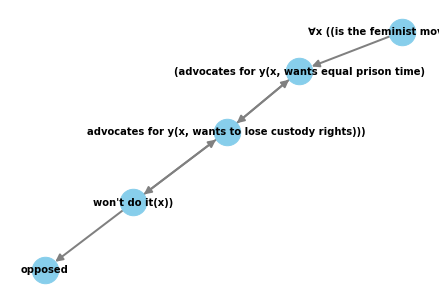

In [100]:
import networkx as nx
import matplotlib.pyplot as plt
import ast
# 创建一个有向图
map_weight = {True:-1,False:1}
def build_graph(graph,prev,value,opera_sign):
    graph.add_nodes_from([item.lower().replace('¬','') for item in prev])
    graph.add_nodes_from([item.lower().replace('¬','') for item in value])
    if opera_sign == '∧':
        graph.add_edges_from([(itemx.lower().replace('¬',''),itemy.lower().replace('¬',''),{'weight':map_weight['¬' in itemy]}) for itemx in prev for itemy in value if itemx != itemy])
        graph.add_edges_from([(itemy.lower().replace('¬',''),itemx.lower().replace('¬',''),{'weight':map_weight['¬' in itemx]}) for itemx in prev for itemy in value if itemx != itemy])
    elif opera_sign == '→':
        graph.add_edges_from([(itemx.lower().replace('¬',''),itemy.lower().replace('¬',''),{'weight':map_weight['¬' in itemy]}) for itemx in prev for itemy in value if itemx != itemy])

_all_node = []
# for line in lla_list:
for line in ["∀x ((is the Feminist Movement(x) → (advocates for y(x, wants equal prison time) ∧ advocates for y(x, wants to lose custody rights))) ∧ won't do it(x)) → opposed"]:
    G = nx.DiGraph()
    str_stack = []
    line = f'( {line} )'
    # print(line)
    for _index,item in enumerate(line.split(' ')):
        # print(item,str_stack)
        # print(_index == len(line.split(' '))-1)
        if item != ')':
            str_stack.append(item)
        else:
            # print(item,str_stack)
            sub_fol = []
            # print(str_stack)
            while str_stack[-1] != '(':
                sub_fol.append(str_stack[-1])
                str_stack.pop()
                if len(str_stack) == 0: break
            
            str_stack.pop()
            assert sub_fol[0] not in ['∧','→','∨']
            sub_fol.reverse()
            sub_fol = split_opera_sign(' '.join([str(item) for item in sub_fol]))
            # print(sub_fol)
            sub_fol = [ast.literal_eval(item) if item.startswith('[') else item for item in sub_fol]

            prev = []
            value = []
            pre_sign = ''
            for _item in sub_fol:
                if _item not in ['∧','→','∨']:
                    if type(_item) == list:
                        value = _item
                    else:
                        value= [_item]
                    _all_node.extend(value)
                else:
                    if len(prev) != 0:
                        build_graph(G,prev,value,pre_sign)
                    # else:
                    pre_sign = _item
                    prev = value
                    value = []
            if len(prev) != 0 and len(value) != 0:
                build_graph(G,prev,value,pre_sign)
            str_stack.append(_all_node)
            _all_node = []
pos = nx.spring_layout(G)  # 指定节点位置布局
nx.draw(G, pos, with_labels=True, font_weight='bold', arrowsize=15, node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=2)

plt.show()


In [144]:
import numpy as np
import networkx as nx

def nx_to_edge_index_edge_type_np(graph):
    edge_index = []
    edge_type = []

    # 将每条边的起始节点、目标节点和关系类型添加到相应的列表中
    for edge in graph.edges(data=True):
        start, end, attr = edge
        edge_index.append([start, end])
        edge_type.append(attr.get('edge_type', 0))  # 如果没有定义关系类型，默认为0

    # 将列表转换为NumPy数组
    edge_index = np.array(edge_index, dtype=np.int64).T.copy()
    edge_type = np.array(edge_type, dtype=np.int64)

    return edge_index, edge_type

# 创建一个简单的图
G = nx.MultiDiGraph()
G.add_edge(0, 1, edge_type=0)
G.add_edge(1, 2, edge_type=1)
G.add_edge(2, 0, edge_type=2)

# 转换成edge_index和edge_type的格式
edge_index, edge_type = nx_to_edge_index_edge_type_np(G)

print("Edge Index:")
print(edge_index)
print("Edge Type:")
print(edge_type)


Edge Index:
[[0 1 2]
 [1 2 0]]
Edge Type:
[0 1 2]


In [146]:
a = ['b','a','dd']
c = {key:value for value,key in enumerate(a)}
c

{'b': 0, 'a': 1, 'dd': 2}

In [142]:
import numpy as np

# # 原始矩阵
original_matrix = np.array([[0., 1., 0., 0., 1.],
                            [1., 0., 1., 0., 1.],
                            [0., 1., 0., 1., 1.],
                            [0., 0., 0., 0., 1.],
                            [0., 0., 0., 0., 0.]])
# original_matrix = np.vstack([original_matrix, np.zeros((2, original_matrix.shape[1]))])
# original_matrix = np.hstack([original_matrix, np.zeros((original_matrix.shape[0], 2))])
# # 复制第4行，并插入到矩阵中
# new_row = original_matrix[3, :]
# original_matrix = np.insert(original_matrix, 3, new_row, axis=0)

# # 复制第4列，并插入到矩阵中
# new_col = original_matrix[:, 3]
# original_matrix = np.insert(original_matrix, 3, new_col, axis=1)

# print(original_matrix)
# original_matrix[:2,:2]
# torch.tensor([original_matrix.tolist(),original_matrix.tolist()]).long().size()
np.fill_diagonal(original_matrix, 1)
original_matrix



array([[1., 1., 0., 0., 1.],
       [1., 1., 1., 0., 1.],
       [0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.]])

In [138]:
a = torch.tensor([[1,1,1],[2,2,2],[3,3,3],[4,4,4]])
a.float()

tensor([[1., 1., 1.],
        [2., 2., 2.],
        [3., 3., 3.],
        [4., 4., 4.]])

In [140]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [137]:
for i in a:
    print(i)

tensor([1, 1, 1])
tensor([2, 2, 2])
tensor([3, 3, 3])
tensor([4, 4, 4])


In [130]:
len('')

0

In [129]:
def clean_data(text):
        text = re.sub(r'\((\w)\)',r' ',text)
        text = text.replace('¬∀x','∀x ¬')
        text = text.replace('¬∃x','∀x ¬')
        text = text.replace('¬∃y','∀y ¬')
        text = text.replace('¬∃y','∀y ¬')
        text = text.replace('¬','¬ ')
        text = text.replace('(','( ')
        text = re.sub(r'∃\w|∀\w','',text).strip()
        text_list = text.split(' ')
        text = ' '.join([item for item in text_list if item not in stopwords_list])
        # return text
        text = re.sub(r'\s+',' ',' '.join(re.findall(pattern, text))).replace('¬ ','¬')
        cnt = 0
        # print(text)
        while '¬(' in text and cnt <=3:
            # print(text)
            text = fit_text(text)
            cnt += 1

        return re.sub(r'\s+',' ',' '.join(re.findall(pattern, text))).replace('¬ ','¬')
clean_data("∀x (is abortion(x) → (¬∃y (y → ¬requires consent(y)) ∧ sentence is supportive of(x))) → support")

'( abortion → ( ( ¬→ ¬¬requires consent ) ∧ sentence supportive ) ) → support'

测试bert

In [69]:
from transformers import BertConfig, BertTokenizer, BertModel, \
                         RobertaConfig, RobertaTokenizer, RobertaModel, \
                         AlbertTokenizer, AlbertConfig, AlbertModel, \
                         AutoTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


In [76]:
str_text = 'donald trump is a people candidated'
tokenizer.encode_plus(str_text,return_tensors='pt',add_special_tokens=False)

{'input_ids': tensor([[6221, 8398, 2003, 1037, 2111, 4018, 2094]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

In [79]:
for sign_text in str_text.split(' '):
    print(tokenizer.encode(sign_text,add_special_tokens=False))

[6221]
[8398]
[2003]
[1037]
[2111]
[4018, 2094]


In [94]:
import torch
a = torch.Tensor(3,4,1)

In [97]:
a = a.squeeze(-1)
a.size()

torch.Size([3, 4])